# Tarea 1

* Felipe Miranda Arboleda
* Emilio Porras Mejía

## Enunciado

La suma de Riemann aproxima el área bajo una curva usando una partición del dominio en n segmentos y un rectángulo para aproximar el área en cada segmento. En este ejercicio, en lugar de un rectángulo usarás una figura compuesta por un rectángulo y una semicircunferencia con diámetro $(x_i,f(x_i))$ y $(x_i+1,f(x_i+1))$, como se muestra en la Figura Semi Riemann. Aproximar el área bajo la función de densidad de la distribución exponencial, para diferentes número de particiones usando la aproximación descrita arriba. Comparar el área real con la aproximación para varios valores de $n$.

La suma luce de a siguiente manera:

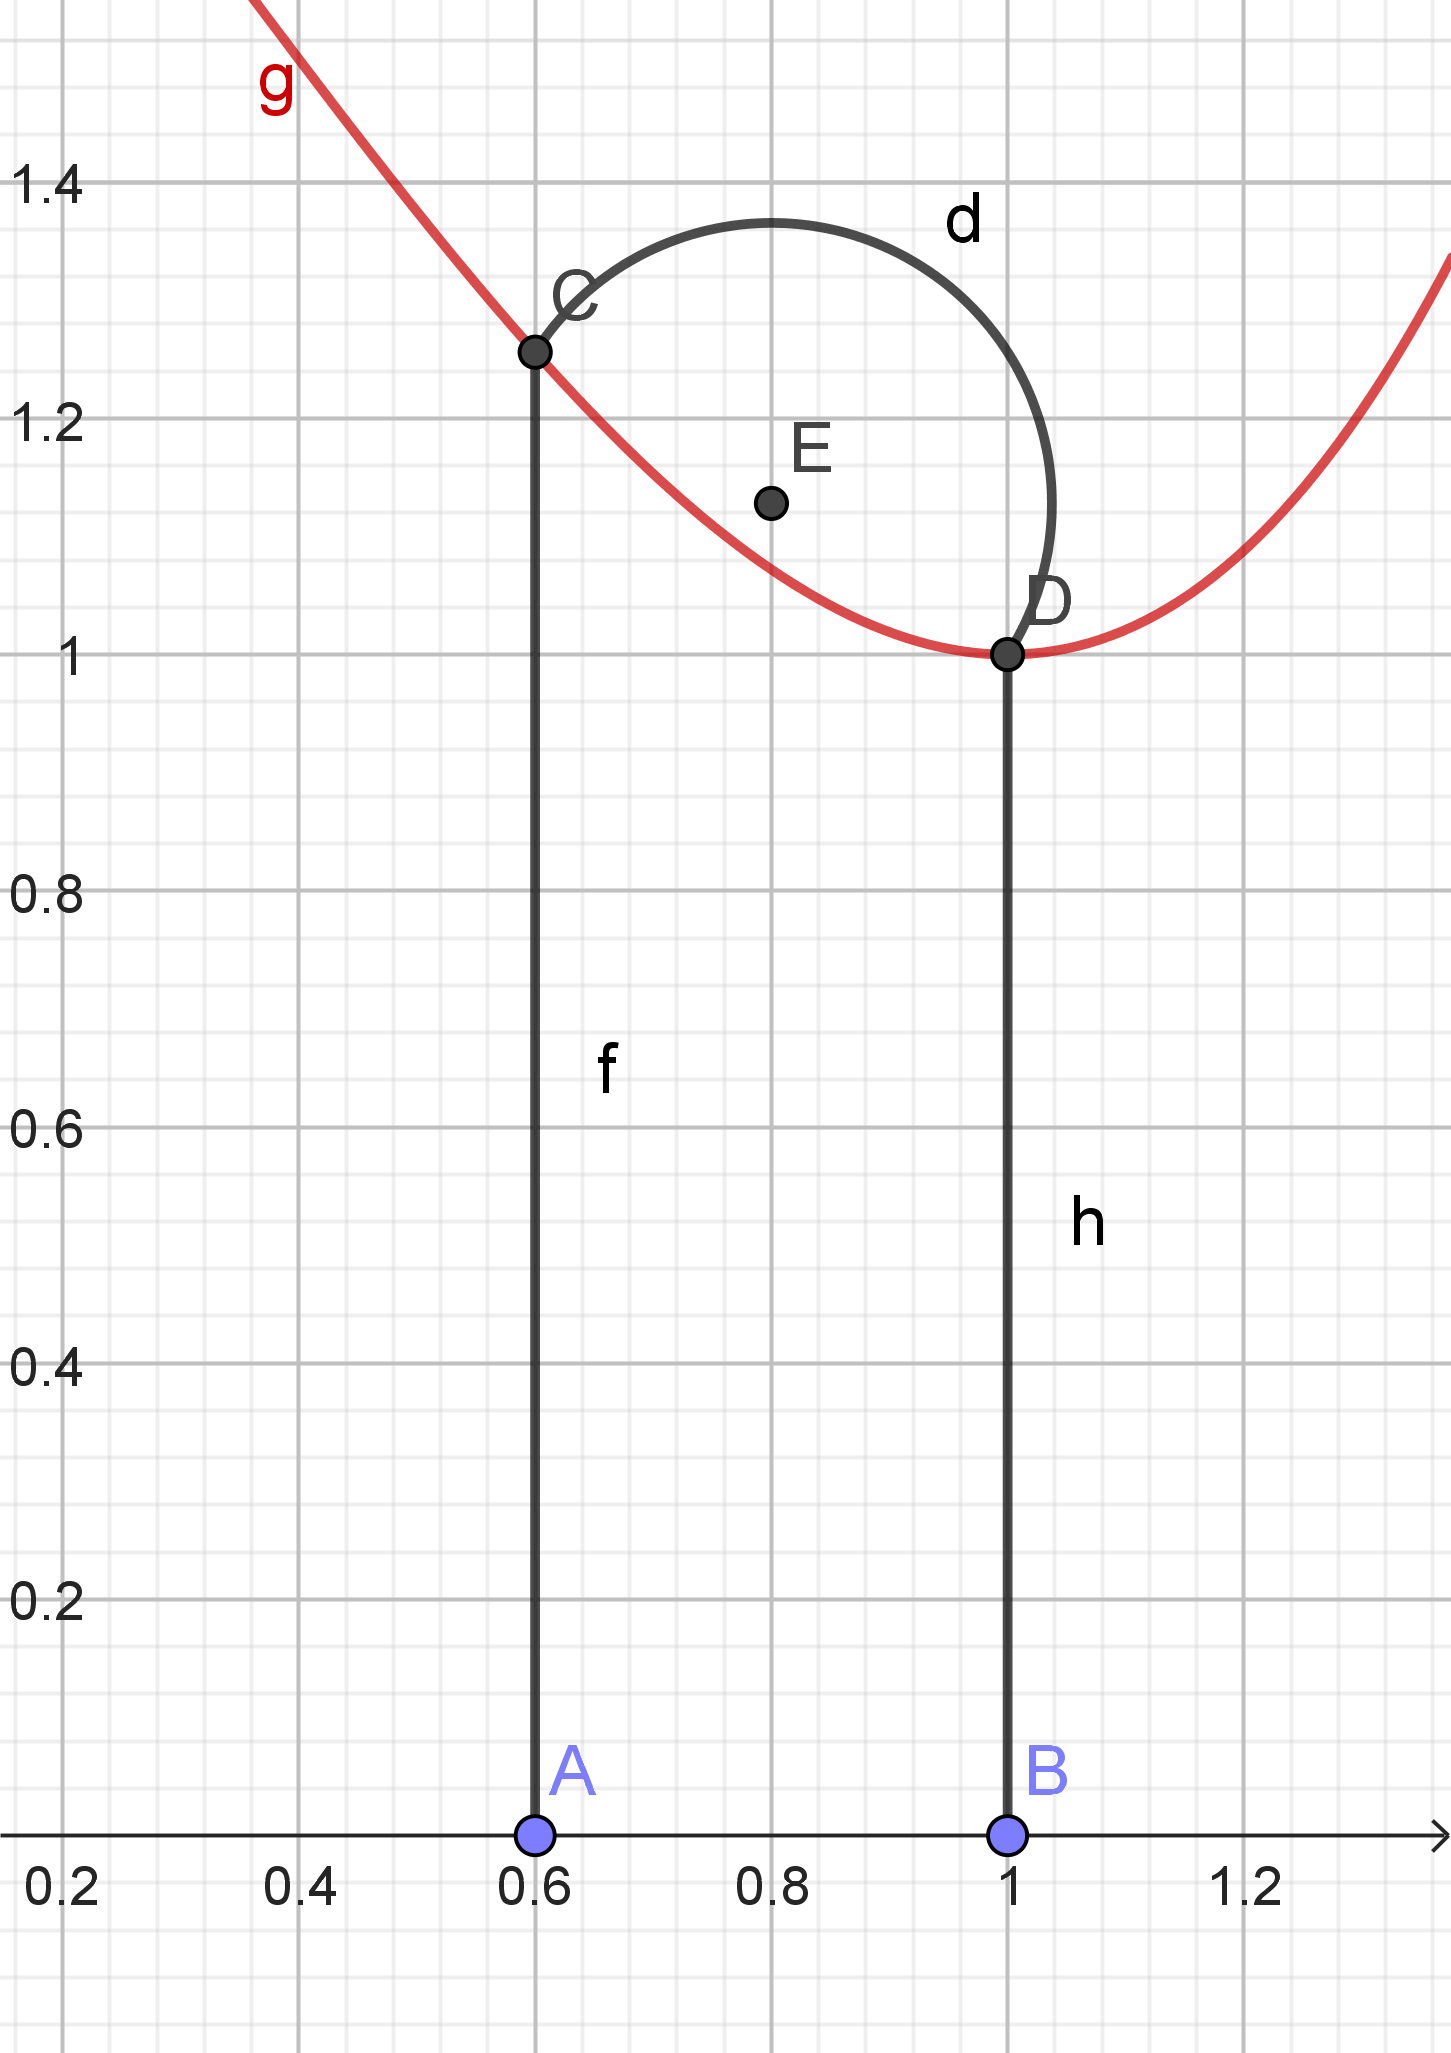



*figura 1: Semi-Riemann*

## Solución

La suma de semi-Riemman se resolverá evaluando la función en n pasos. Para formar cada uno de los segmentos, se utilizará la siguiente lógica:


Se partirá en tres partes cada uno de los segmentos



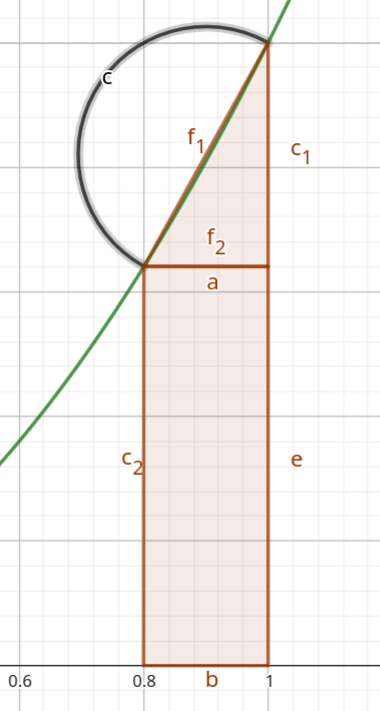



*figura 2: Semi-Riemann*

### Parte 1
Rectángulo con base $b$ igual al paso y con altura $h$ que igual a
$\min{(f(x_i),f(x_{i+1}))}$. Luego su Área $A = bh$. Se llamará `rectangle_area`.



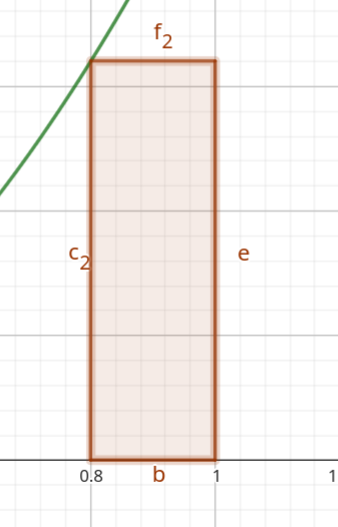

*figura 3: parte 1 Semi-Riemann*



### Parte 2
Triángulo con base $b$ igual al paso y con altura $h$ que igual a
$\max{(f(x_i),f(x_{i+1}))} - \min{(f(x_i),f(x_{i+1}))}$. Luego su Área $A = bh/2$. Se llamará `triangle_area`.

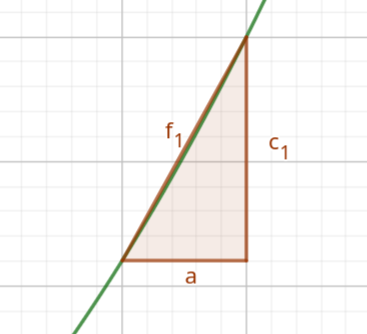

*figura 4: parte 2 para Semi-Riemann*

### Parte 3
Semicírculo con diámetro $d$ igual a la distancia entre $(x_i, f(x_i)), (x_{i+1}, f(x_{i+1}))$. Luego su es Área $A = \pi (d/2)^2$. Se llamará `semicircle_area`.

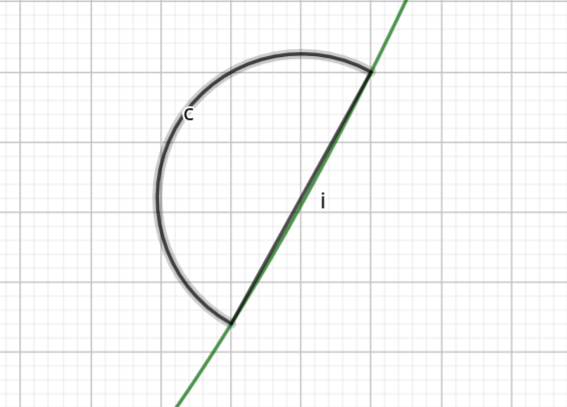

*figura 5: parte 3 para Semi-Riemann*

####Condiciones
 * $f$ está definida y es continua en $[a,b]$
 * $f:{\mathbb{R}}\to{\mathbb{R}}$
 * $b\gt a$
 * $n \in \mathbb{N}$
 * $a,b \in \mathbb{R}$


In [20]:
import math
from typing import Callable #Para hacer tipado fuerte en la función callback

In [21]:
def semi_riemann(f: Callable[[float], float], a: float, b: float, n: int) -> float:
  """
  Función que calcula y retorna la suma de Semi-Riemann

        Parametros
        ----------
          f : function(float) -> float,
          Recibe una función matemática f(x). Esta recibe un valor de x
          y devuelve el resultado de su cálculo en x.

          a: float,
          Límite inferior de la suma de Semi-Riemann.

          b: float,
          Límite superior de la suma de Semi-Riemann.

          n: int,
          Número de pasos que se desean efectuar para la aproximación de la suma
          de Semi-Riemann.

        Returns
        ------
          float,
          Retorna un número de punto flotante equivalente a la suma de
          Semi-Riemann de la función f que va desde a hasta b y con n pasos.
  """
  if b <= a or n < 1:
    return 0

  length = b - a
  step = length / n


  total_sum = 0
  for i in range(n):
    x1 = a + i * step
    x2 = x1 + step
    fx1 = f(x1)
    fx2 = f(x2)

    '''
    #Si se desea observar los resultados sobre cada iteration, descomentar estas líneas

    print(f'iteration {i}: x1: {x1}, x2: {x2}')
    print(f'              fx1: {fx1}, fx2: {fx2}')
    print()
    '''
    short_bar = min(fx1, fx2)
    large_bar = max(fx1, fx2)

    rectangle_height = short_bar
    rectangle_area = rectangle_height * step

    triangle_height = large_bar - short_bar
    triangle_area = triangle_height * step / 2

    circle_radius = math.sqrt( math.pow( x2 - x1 , 2 ) + math.pow( fx2 - fx1, 2 ) ) / 2
    circle_area = math.pi * math.pow( circle_radius, 2 )
    semicircle_area = circle_area / 2

    semi_riemann_sum = rectangle_area + triangle_area + semicircle_area

    total_sum += semi_riemann_sum


  return total_sum

### Ejemplo 1

$f_1(x) = x+1$

Se prueba con $a = 0$, $b=3$, con 2 valores para $n$.

In [22]:
def f1(x):
  """
  Función correspondiente a f(x) = x + 1

        Parametros
        ----------
          x: float,
          valor x en el cual se busca evaluar f.

        Returns
        ------
          float,
          Retorna el resultado de operar x en f, es decir, x+1.
  """
  return x + 1

print(f'Resultado: {semi_riemann(f = f1, a = 0, b = 3, n = 10):.4f}')

Resultado: 8.2069


In [23]:
print(f'Resultado: {semi_riemann(f = f1, a = 0, b = 3, n = 100):.4f}')

Resultado: 7.5707


Se observa que a mayor cantidad de pasos (n mayor), se acerca más al resultado real del área bajo la curva (en este caso, 7.5).


### Ejemplo 2:
$f(x) = \sin{(x)}$

Para este ejemplo, tomaremos el intervalo $a = 0$, $b = 𝜋$ donde sabemos que el área bajo $\sin{(x)}$ es $2$. Usaremos diferentes valores de $n$ para ver cómo la aproximación de la suma es cada vez más exacta.

In [24]:
a = 0
b = math.pi

def f_sin(x):
    """
  Función correspondiente a f(x) = sin(x)

        Parametros
        ----------
          x: float,
          valor x en el cual se busca evaluar f.

        Returns
        ------
          float,
          Retorna el resultado de operar x en f, es decir, sin(x).
  """
    return math.sin(x)


print(f'Resultado: {semi_riemann(f=f_sin, a=a, b=b, n=10):.4f}')

Resultado: 2.5633


In [25]:
print(f'Resultado: {semi_riemann(f=f_sin, a=a, b=b, n=100):.4f}')

Resultado: 2.0580


In [26]:
print(f'Resultado: {semi_riemann(f=f_sin, a=a, b=b, n=1000):.4f}')

Resultado: 2.0058


### Función de Error Relativo

Definimos la función de error relativo y la aplicamos a las aproximaciones previamente calculadas en cada ejemplo

In [27]:
def error_relativo(real: float, aproximado: float) -> float:
    """
    Calcula el error relativo entre un valor real y un valor aproximado.

    Parametros
    ----------
    real : float
        Valor real o exacto.
    aproximado : float
        Valor aproximado.

    Returns
    -------
    float
        El error relativo, dado por |(real - aproximado) / real|.
    """
    return abs(real - aproximado) / abs(real)

Para el Ejemplo 1

In [28]:
print(f'Error relativo : {error_relativo(7.5, semi_riemann(f = f1, a = 0, b = 3, n = 10)):.4f}')

Error relativo : 0.0942


In [29]:
print(f'Error relativo : {error_relativo(7.5, semi_riemann(f = f1, a = 0, b = 3, n = 100)):.4f}')

Error relativo : 0.0094


Para el Ejemplo 2

In [30]:
print(f'Error relativo : {error_relativo(2, semi_riemann(f=f_sin, a=a, b=b, n=10)):.4f}')

Error relativo : 0.2817


In [31]:
print(f'Error relativo : {error_relativo(2, semi_riemann(f=f_sin, a=a, b=b, n=100)):.4f}')

Error relativo : 0.0290


In [32]:
print(f'Error relativo : {error_relativo(2, semi_riemann(f=f_sin, a=a, b=b, n=1000)):.4f}')

Error relativo : 0.0029


Observamos que el error relativo disminuye, como se espera, de manera proporcional a medida que el n aumenta.